In [1]:
import mnist_reader

In [2]:
import numpy as np


In [3]:

X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

training_data = X_train.data[:5000]
training_target = y_train.data[:5000]

testing_data = X_test.data[:5000]
testing_target = y_test[:5000]


In [4]:
print(training_data.shape)
print(training_target.shape)
print(testing_data.shape)
print(testing_target.shape)


(5000, 784)
(5000,)
(5000, 784)
(5000,)


In [5]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [6]:
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


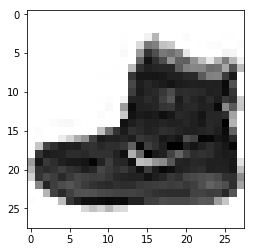

In [7]:
x_1 = X_train[0].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(x_1,cmap='gray_r')
plt.show()

In [8]:
y_train[0]

9

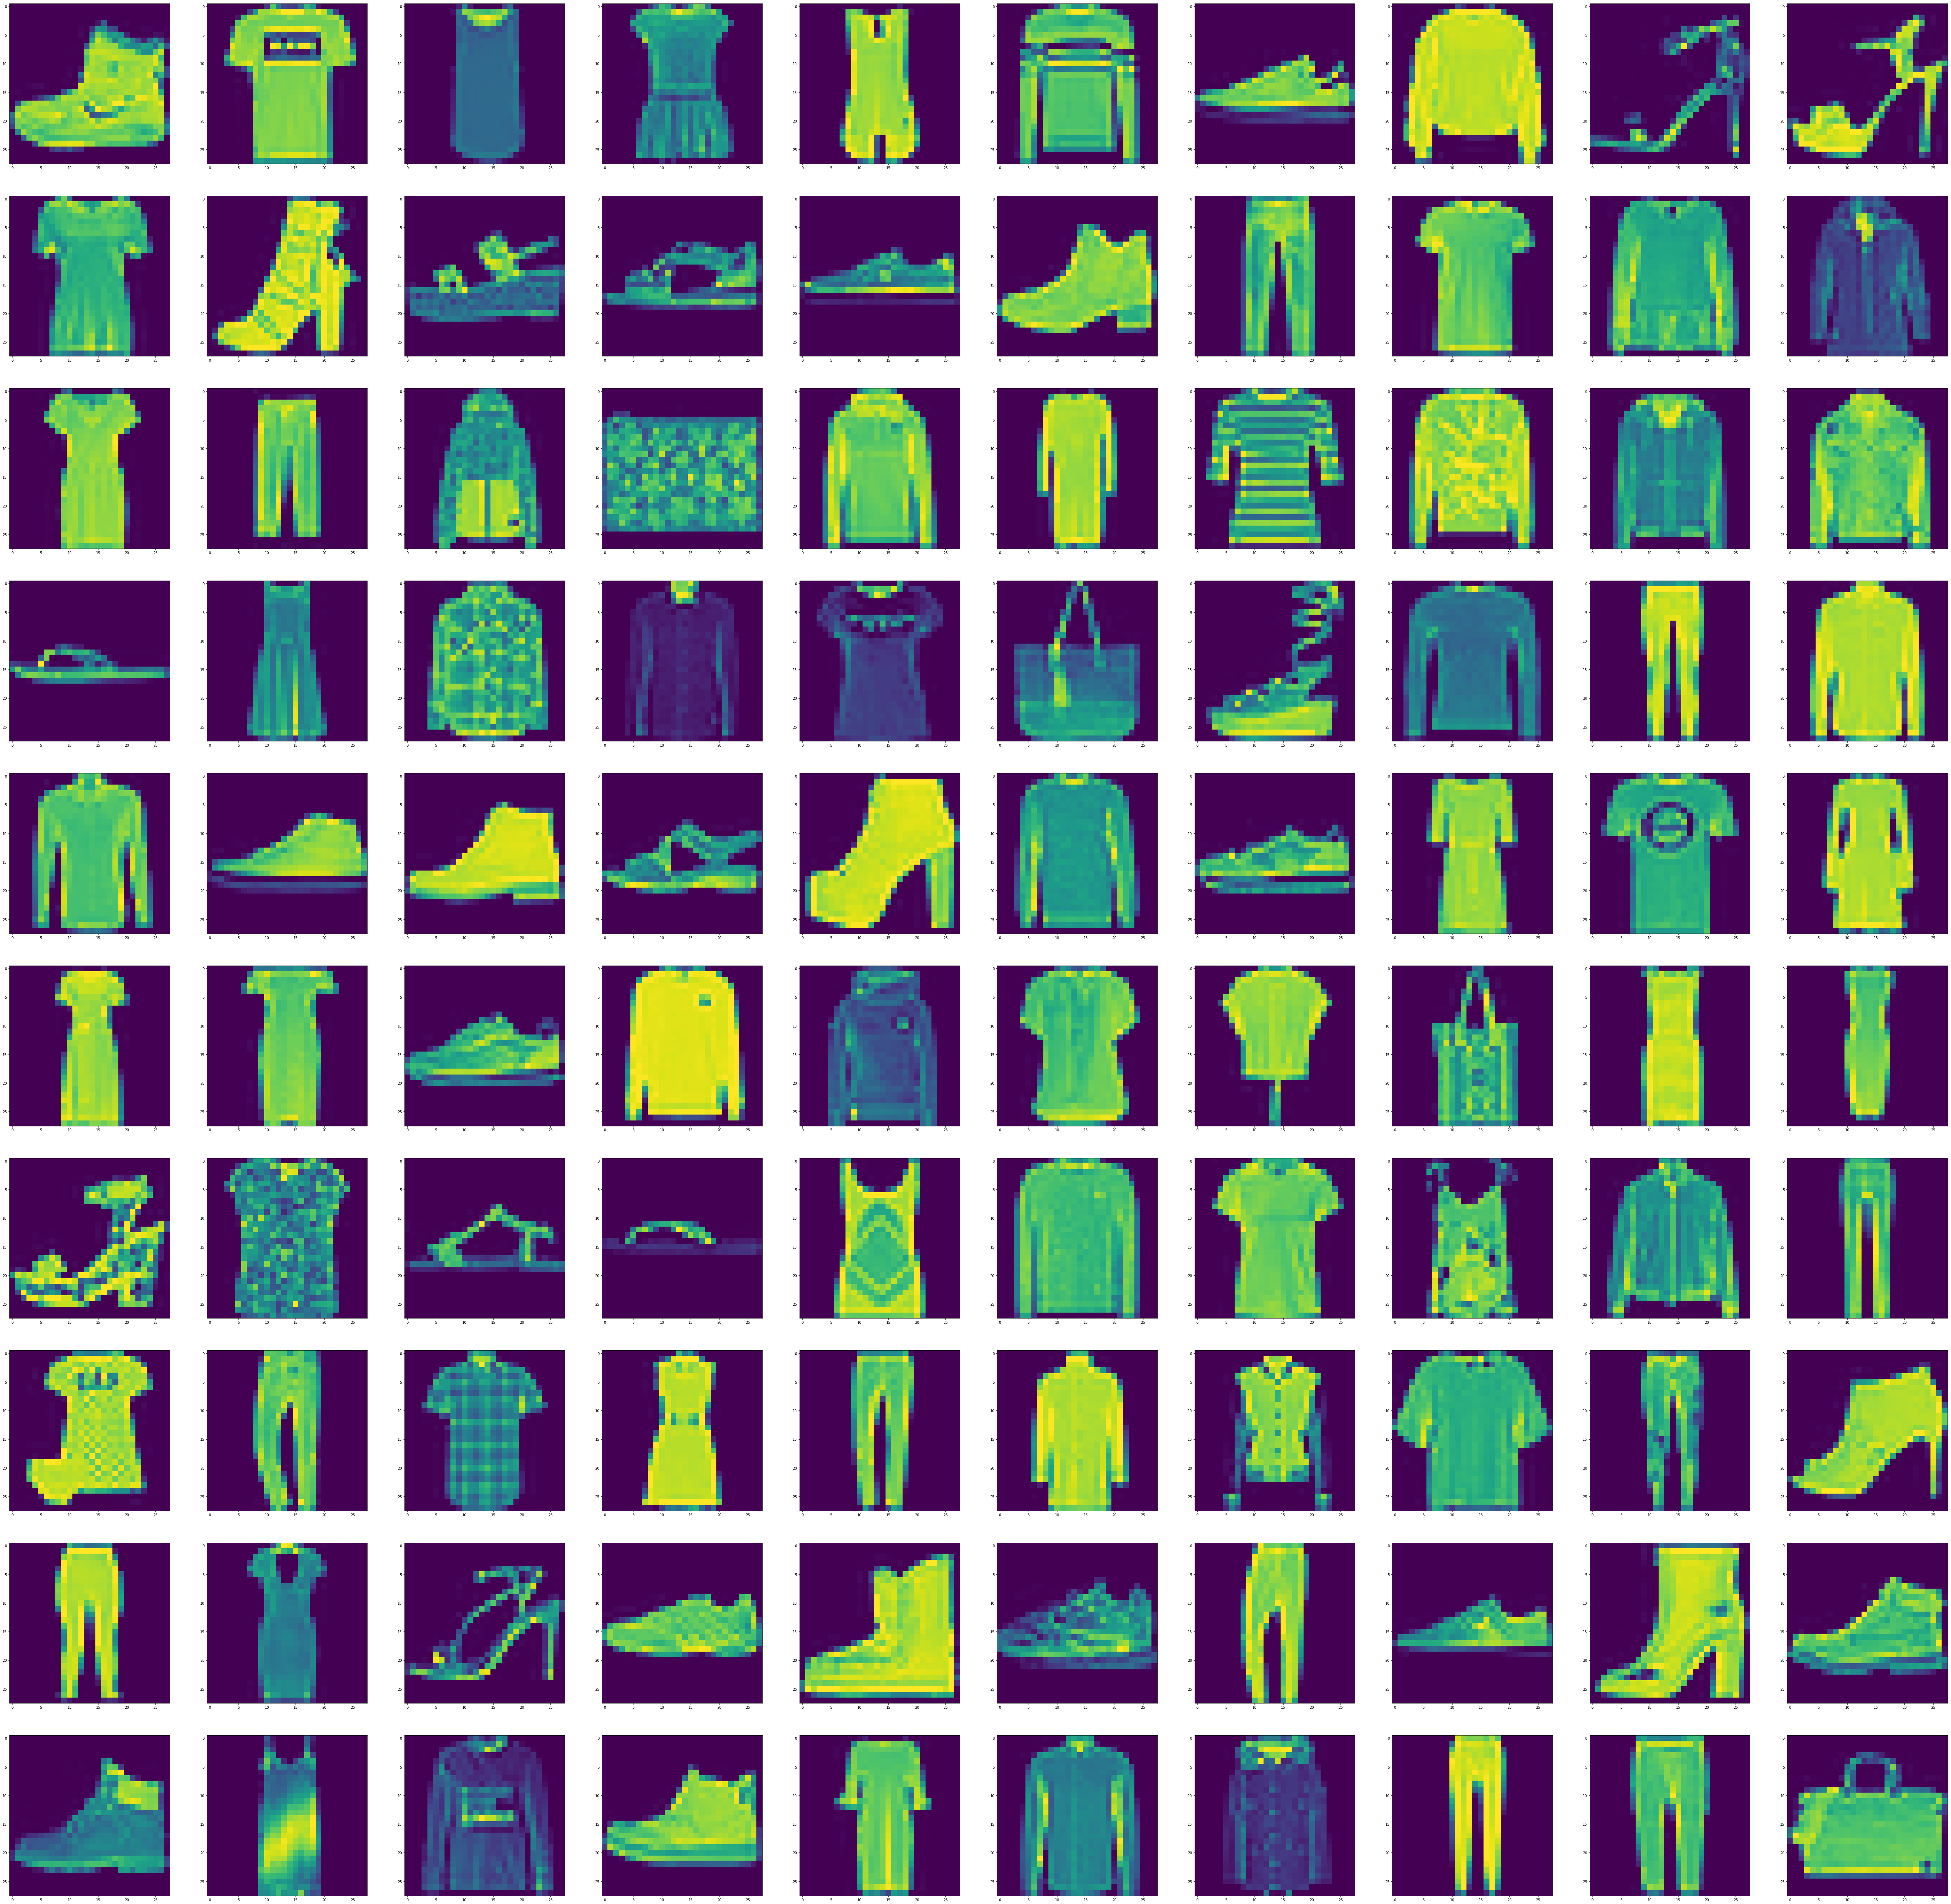

In [9]:
fig = plt.figure(figsize=(100,100))
for i in range(0,100):
    x_2 = X_train[i].reshape(28,28)
    fig.add_subplot(10,10,i+1)
    plt.imshow(x_2)
plt.show()    

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(training_data, training_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
import numpy as np
predict = neigh.predict(testing_data)
correct = np.sum(predict == testing_target)
total = testing_data.shape[0]
accuracy = correct/total*100
print(correct)
print(total)
print(accuracy)

3983
5000
79.66


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(testing_target,predict))

0.7966


[[399   3  16  18   2   0  63   1   5   0]
 [  6 459   3  11   1   0   1   0   0   0]
 [ 15   0 363   4  86   0  53   0   0   0]
 [ 37  12   5 388  39   0  17   0   2   0]
 [  7   1  83  24 351   0  54   0   1   0]
 [  3   0   0   0   0 379   1  57   3  42]
 [100   4  66   8  48   0 250   0   6   0]
 [  0   0   0   0   0   4   0 459   0  37]
 [  4   1  15   2   4   2  12   6 477   3]
 [  0   0   1   0   0   0   0  18   0 458]]


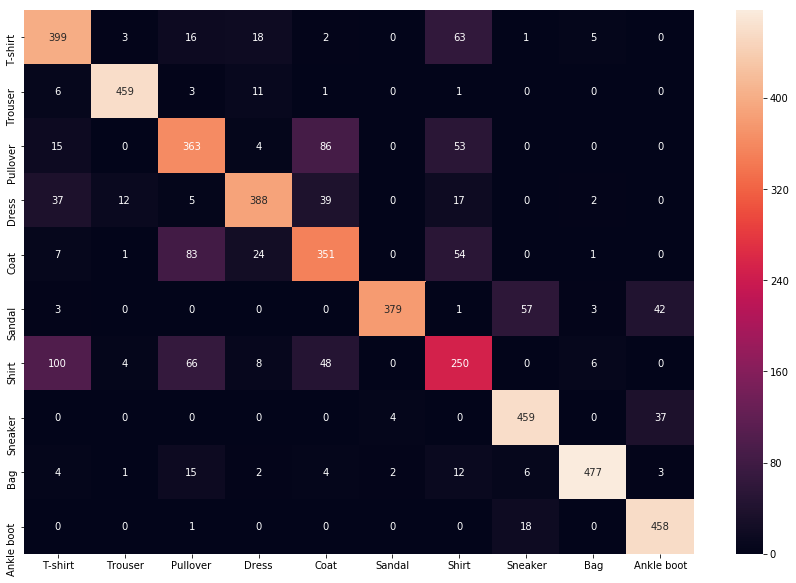

In [101]:
import pandas as pd
import seaborn as sn

from sklearn.metrics import confusion_matrix
array = confusion_matrix(testing_target,predict)
print(conf_arr)
labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [67]:
print(predict)
print(testing_target)

[9 2 1 ... 9 0 7]
[9 2 1 ... 9 0 7]


In [73]:
from sklearn import svm
s = svm.SVC(kernel = 'linear')
s.fit(training_data,training_target)
s_predict = s.predict(testing_data)
print(accuracy_score(testing_target,s_predict))

0.7984


Confusion matrix, without normalization
[[1.  0.  0. ]
 [0.  0.6 0.4]
 [0.  0.  1. ]]


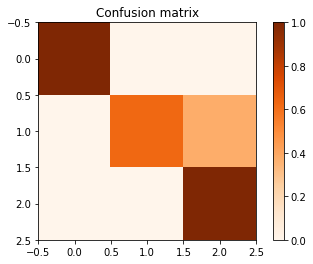

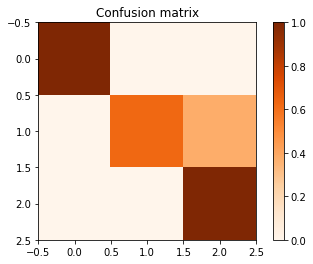

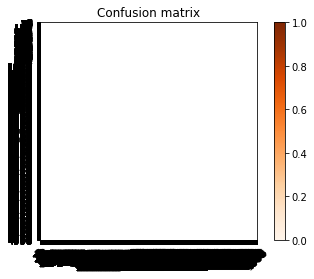

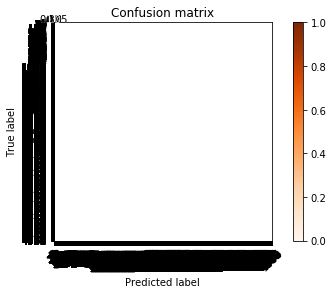

In [78]:
import matplotlib.pyplot as plt
import pandas

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

data = pandas.DataFrame(testing_target, s_predict,labels,dtype='uint8')
print([testing_target])

cor = data.corr()
print(cor.shape)


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

    0
9   9
2   2
1   1
1   1
6   6
1   1
4   4
6   6
5   5
7   7
4   4
5   5
7   7
3   3
4   4
1   1
2   2
2   4
8   8
0   0
2   2
7   5
7   7
5   9
1   1
2   4
6   6
0   0
9   9
4   3
.. ..
5   5
1   1
3   3
0   0
1   1
9   9
3   3
5   5
0   0
4   6
2   2
0   3
1   1
5   5
3   3
2   2
8   8
5   5
7   7
8   8
0   0
1   1
0   1
0   0
6   6
4   4
5   5
9   9
6   0
7   7

[5000 rows x 1 columns]
